In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import ArtistAnimation, FFMpegWriter

path_bousinessq = "./boussinesq.nc"
path_2dcylinder = "./cylinder2d.nc"

In [ ]:
def loadDataset(path):
    return Dataset(path)

In [ ]:
cylinder2D = loadDataset(path_2dcylinder)
boussinesq = loadDataset(path_bousinessq)
print(cylinder2D)
print(boussinesq)

## Info about the datasets

### Cylinder 2D

    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const),                             float32 radius(const), float32 Re(const)

### Bousinessq


    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim),
                           float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)

### Accessing variables

    cylinder2D['variable_name']


In [ ]:
type(cylinder2D['xdim'])
print(cylinder2D['u'].shape)
print(cylinder2D['tdim'].shape)

In [ ]:
data = cylinder2D

def velFromUV(data):
    
    u = data['u'][1000,:,:]
    v = data['v'][1000,:,:]

    vel = np.sqrt(u**2 + v**2)

In [ ]:
u = np.array(cylinder2D['u'])

fig, ax = plt.subplots()
ims = [[ax.imshow(u[i], animated=True)] for i in range(1, len(u))]

ani = ArtistAnimation(fig, ims, interval=1000 , blit=True, repeat_delay=1000)

# plt.show()

# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

In [ ]:
plt.matshow(data['v'][1000,:,:])
plt.axis('off')
plt.show()

```
% Create snapshot matrix
Nt = length(S(1,1,:));
S = reshape(permute(S, [3 2 1]), Nt, [ ]); % Reshape data into a matrix S with Nt rows
U = S - repmat(mean(S,1), Nt, 1); % Subtract the temporal mean from each row

% Create correlation matrix
C_s = (U*U')/(Nt-1);

% Solve eigenvalue problem
[A_s LAM_s] = eig(C_s,'vector');

% Sort eigenvalues and eigenvectors
[lambda_s,ilam_s] = sort(LAM_s,'descend');
A_s = A_s(:, ilam_s);

% These are the temporal modes
% Calculate spatial coefficients
PHI_s = U'*A_s;

% Reconstruction on mode k
k = 1; % for example
Utilde_k_s = A_s(:,k)*PHI_s(:,k)';

% Normalization to match direct and snapshot modes (optional)
PHI = normc(PHI_s);

% Spatial modes
A = U*PHI;

% Time coefficients
Utilde_k = A(:,k)*PHI(:,k)';
% Reconstruction on mode k
```

In [ ]:
S = np.transpose(u, (1,2,0))
print(S.shape)
Nt = u.shape[0]
print(Nt)
U = 

In [ ]:
from zipfile import ZipFile

url = "https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip"
file_name = "../data2/" + url.split('/')[-1]
with ZipFile(file_name, 'r') as zipObj:
   zipObj.extractall('temp')

# Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
Input=np.load('../data/cylinder_u.npy')

In [ ]:
Output=np.load('../output/16_400.npy')
# ip=np.load('../input/200.npy')

In [ ]:
plt.imshow(Output[0,-1])

In [ ]:
plt.imshow(Input[1475])
# plt.imshow(ip[510])

In [ ]:
# plt.imshow(Input[500])
plt.imshow(Input[950])

In [ ]:
fig=plt.figure(1)
plt.subplot(2, 1, 1)
plt.imshow(Output[800])
plt.subplot(2,1,2)
plt.imshow(Input[800])
plt.savefig('comp')

In [ ]:
plt.imshow(Output[800]-ip[800])
plt.colorbar(orientation='horizontal')

In [ ]:
np.max(Output[200][:,100]-Input[200][:,100])

In [ ]:
print(np.min(Input[800]))
print(np.min(Output[800]))
print(np.max(Input[800]))
print(np.max(Output[800]))

In [ ]:
print(np.min(ip[800]))
print(np.max(ip[800]))

In [ ]:
import numpy as np
import pyJHTDB

In [ ]:
# 2048×512×1536
t = np.linspace(0, 8*np.pi, 512)
l = np.linspace(-1, 1, 128)
x = np.zeros((t.shape[0], l.shape[0], 3), np.float32)
# print(t[np.newaxis, :].shape)
x[:, :, 0] = t[:, np.newaxis]
x[:, :, 1] = l[np.newaxis,:]
x[:, :, 2] = 0.
print(x.shape)
# x = x.transpose(0,2,1)
# print(x)

In [ ]:
t1 = np.linspace(0, 2*3.14, 256)
t2 = np.linspace(-0.5, 0.5, 256)
x = np.zeros((t1.shape[0], t2.shape[0], 3), np.float32)
x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0
print(x.shape)

In [ ]:
xy = np.mgrid[0:2048:8*np.pi, 0:1534:3*np.pi]#.reshape(2048,-1).T
print(xy.shape)
# print(xy)

In [ ]:
lJHTDB = pyJHTDB.libJHTDB()
lJHTDB.initialize()

#Add token
auth_token  = "edu.cmu.andrew.ppant-68a123d6"  #Replace with your own token here
lJHTDB.add_token(auth_token)

import pyJHTDB.dbinfo
T = pyJHTDB.dbinfo.channel5200['time'][-1]
# T =10.0

# Select points in the database to query
# lpoints = []
# for i in range(0,3):
#     lpoints.append([np.random.uniform(0, 8*3.14),np.random.uniform(-1, 1),np.random.uniform(0, 3*3.14)])

# # 2D array with single precision values
# points = np.array(lpoints,dtype='float32')

# time = np.random.random()*T
time = 24.0
# u = lJHTDB.getData(
#                time,
#                x,
#                sinterp = 4,
#                data_set ='channel5200',
#                getFunction='getVelocity')
# ubox = lJHTDB.getBoxFilter(
#                time,
#                x,
#                field = 'velocity',
#                data_set = 'channel',
#                filter_width = 5*(2*np.pi / 1024))
# lJHTDB.finalize()
result = lJHTDB.getData(time, x, data_set='channel',
        sinterp = 4, tinterp = 0,
        getFunction = 'getVelocity')
print(result.shape)
# print(result)
# print(u.shape)
print(time)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(result[:,:,0])
plt.imsave('try.png', result[:,:,0])

In [ ]:
# print(u.shape)
fig = plt.figure(figsize = (t1[-1] - t1[0], t2[-1] - t2[0]))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow([:,:,0],
         extent = [t1[0], t1[-1] - t1[0], t2[0], t2[-1] - t2[0]],
         interpolation = 'none')

In [ ]:
import shutil
T = np.arange(0., 25.0, 0.01)
X = np.linspace(0, 8*np.pi, 4)
Y = np.linspace(-1, 1, 4)
Z = np.arange(0, 3*np.pi, 0.1)x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0

x = np.zeros((p.shape[0], p.shape[0], 3), np.float32)
les = []
dns = []
count = 0
# if os.path.exists('DNS-LES/les'):
#     shutil.rmtree('DNS-LES/les')
# if os.path.exists('DNS-LES/dns'):
#     shutil.rmtree('DNS-LES/dns')
if not os.path.exists('DNS-LES/les'):
    os.mkdir('DNS-LES/les')

if not os.path.exists('DNS-LES/dns'):
    os.mkdir('DNS-LES/dns')

In [ ]:

def create_turb_dataset(t):
    count = 0
    Nx = 512
    Ny = 128
    #for t in T:
    start_time = time.time()
    print("Time:",t)
    for idx in range(len(X)-1):
        px = np.linspace(X[idx], X[idx+1], Nx)
        for idy in range(len(Y)-1):
            py = np.linspace(Y[idy], Y[idy+1], Ny)
            for z in Z:
            
                x[:, :, 0] = px[np.newaxis, :]
                x[:, :, 1] = py[:, np.newaxis]
                x[:, :, 2] = z

                u, u_box= u_data(t, x)
                #les.append(u_box)
                #dns.append(u)
                if not os.path.exists('DNS-LES/les/%.2f'%t):
                    os.mkdir('DNS-LES/les/%.2f'%t)
                if not os.path.exists('DNS-LES/dns/%.2f'%t):
                    os.mkdir('DNS-LES/dns/%.2f'%t)

                for itx in range(3):
                    norm1 = cv2.normalize(u[:,:,itx], 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    norm2 = cv2.normalize(u_box[:,:,itx], 0, 255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    if count%100 == 0:
                        print(count)

                    cv2.imwrite("DNS-LES/dns/%.2f/%d.png"%(t,count), norm1)
                    cv2.imwrite("DNS-LES/les/%.2f/%d.png"%(t,count), norm2)
                    count+=1
                    end_time = time.time()
    print("Time: {:.2f} s".format(end_time-start_time))

In [ ]:
# 2048×512×1536
px = np.linspace(0, 8*np.pi, 512)
py = np.linspace(-1, 1, 128)
x = np.zeros((px.shape[0], py.shape[0], 3), np.float32)
# print(t[np.newaxis, :].shape)
x[:, :, 0] = px[:, np.newaxis]
x[:, :, 1] = py[np.newaxis,:]
x[:, :, 2] = 0.

T = np.linspace(0., 25.9, 1000)
dataset = np.zeros((len(T), 512, 128))

for idx, time in enumerate(T):
    print(idx)
    dataset[idx] = lJHTDB.getData(time, x, data_set='channel',
        sinterp = 4, tinterp = 0,
        getFunction = 'getVelocity')[:,:,0]
print(dataset.shape)
np.save('../data/channel_data.npy', dataset)

In [ ]:
A = np.zeros(5)
print(A)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
dataset = np.load('../data/channel_data_2500.npy')
print(dataset.shape)
plt.imshow(dataset[-1])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

u_comp = np.load('../data/Velocity160.npz', allow_pickle=True)
u_flat = u_comp['arr_0']
print(u_flat.shape)
u = u_flat.reshape(u_flat.shape[0], 320, 80)
u = np.transpose(u, (0, 2, 1))
u_new = np.zeros((u.shape[0], 80, 640))
u_new[..., :320] = u
u = u_new.astype(np.float32)
plt.matshow(u[2000])

In [ ]:
for it in u:
    print(it)

In [ ]:
u['arr_0'].shape

In [ ]:
u = np.load('../data/Velocity160.npz', allow_pickle=True)
u = u_comp['arr_0']
# u = u_flat.reshape(u_flat.shape[0], 320, 80)
# u = np.transpose(u, (0, 2, 1))
print(u.shape)
plt.matshow(u[200])


In [ ]:
dataset = np.load('../data/channel_data_2500.npy')
print(dataset.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
u_flat = np.load('../data/airfoil_80x320_data.npy', allow_pickle=True)
# u_flat = u_comp['arr_0']
u = u_flat.reshape(u_flat.shape[0], 320, 80)
u = np.transpose(u, (0, 2, 1))[:,:,140:-20]
# u_new = np.zeros((u.shape[0], 80, 640))
# u_new[..., :320] = u
# u = u_new.astype(np.float32)
print(u.shape)
print(np.max(u_flat), np.min(u_flat))
plt.matshow(u[400])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
u_flat = np.load('../data/platekepsilon.npy', allow_pickle=True)
print(u_flat.shape)
# u_flat = u_comp['arr_0']
u = u_flat.reshape(u_flat.shape[0], 360, 180)
u = np.transpose(u, (0, 2, 1))[:,:-20,:-40]
# u_new = np.zeros((u.shape[0], 80, 640))
# u_new[..., :320] = u
# u = u_new.astype(np.float32)
print(u.shape)
print(np.max(u_flat), np.min(u_flat))
plt.matshow(u[400])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
labels = ['2D_cylinder', '2D_sq_cyl', '2D_plate']

dl_rom = [0.0152, 0.0150, 0.0151]
cfd = [0.12, 0.112, 0.128]

# dl_rom = [0.926, 0.851, 0.772]
# cfd = [0.912, 0.828, 0.737]


x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cfd, width, label='CFD', color='gold')
rects2 = ax.bar(x + width/2, dl_rom, width, label='DL-ROM', color='darkorange')

# rects1 = ax.bar(x - width/2, cfd, width, label='LR_Input', color='royalblue')
# rects2 = ax.bar(x + width/2, dl_rom, width, label='dl_rom', color='yellowgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Iteration Time (s)')
ax.set_ylim(0,0.2)
# ax.set_ylabel('SSIM')
# ax.set_xlabel('Dataset')

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.yaxis.label.set_size(13)

# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()
# plt.savefig(f'barplot_PSNR.eps', dpi=600)
# plt.savefig(f'barplot_SSIM.eps', dpi=600)
plt.savefig(f'barplot_time.eps', dpi=600)

plt.show()

In [ ]:
datasets = ['2d_cylinder_CFD', '2d_sq_cyl']#,['2d_plate', 'channel_flow', 'SST']
# datasets = ['2d_plate', 'channel_flow', 'SST']
# x = np.arange(4)
A = np.zeros((5, 20))

fig, ax = plt.subplots()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.set_ylabel('Negative Log MSE')
ax.set_xlabel('Iterations')
ax.set_xlim(-.25,20)
ax.set_ylim(4.5,10.5)
# plt.xticks(x, labels, rotation ='vertical')

for it, dname in enumerate(datasets):
    mse = np.load(f'../simulate/{dname}/mse.npy')[:20]
    A[it] = mse
    plt.plot(-np.log(mse), "o-",label = dname)
    plt.legend(loc='best')

fig.tight_layout()
plt.savefig(f'MSE_vs_iteration_1.eps', dpi=600)
plt.show()

In [ ]:
import os
os.getcwd()

In [ ]:
reduced order modelling for temporal fluid flow prediction using deep learning
Deep learning based reduced order modelling for temporal fluid flow prediction 

In [ ]:
def load_transfer_learning(pretrained, model, PATH):

    checkpoint = torch.load(PATH)
    model.load_state_dict(checkpoint, strict=False)

    layers = []

    for param in pretrained.named_parameters():
        print(param[0])
        layers.append(param[0])

    for param in model.named_parameters():
        if param[0] in layers:
            param[1].requires_grad = False

    # for param in model.named_parameters():
    #     print(param[0], param[1].requires_grad)

    return model

In [150]:
def load_transfer_learning_UNet_3D(pretrained, model, PATH, req_grad=True):

    checkpoint = torch.load(PATH)
    model.load_state_dict(checkpoint, strict=False)

    layers = {}
    # print(model.named_parameters())

    for param in pretrained.named_parameters():
        if param[0][:2] != "d1" and param[0][:2] != "u5":
            # print(param[0])
            # print(type(param[1]))
            layers[param[0]] = param[1].data

    for param in model.named_parameters():
        if param[0] in layers.keys():
            if param[0][:2] != "d1" and param[0][:2] != "u5":
                param[1].data = layers[param[0]]
                param[1].requires_grad = req_grad

    for param in model.named_parameters():
        print(param[0], param[1].requires_grad)

    return model

In [151]:
import numpy as np
import torch 
import  matplotlib.pyplot as plt

# from utils import load_transfer_learning
from model import UNet_3D
pre_dataset_name = "2d_cylinder_CFD"
final_dataset_name = "2d_sq_cyl"
final_model = UNet_3D(name=final_dataset_name)
pretrained = UNet_3D(name=pre_dataset_name)
dataset = "2d_cylinder_CFD"
PATH = f"../results/{dataset}/weights/100.pth"
model = load_transfer_learning_UNet_3D(pretrained, final_model, PATH, False)

d1.net.0.weight True
d1.net.0.bias True
d1.net.1.weight True
d1.net.1.bias True
d1.net.2.weight True
d1.net.2.bias True
d2.net.0.weight False
d2.net.0.bias False
d2.net.1.weight False
d2.net.1.bias False
d2.net.2.weight False
d2.net.2.bias False
d3.net.0.weight False
d3.net.0.bias False
d3.net.1.weight False
d3.net.1.bias False
d3.net.2.weight False
d3.net.2.bias False
d4.net.0.weight False
d4.net.0.bias False
d4.net.1.weight False
d4.net.1.bias False
d4.net.2.weight False
d4.net.2.bias False
d5.net.0.weight False
d5.net.0.bias False
d5.net.1.weight False
d5.net.1.bias False
d5.net.2.weight False
d5.net.2.bias False
down.weight False
down.bias False
up.weight False
up.bias False
u1.net.0.weight False
u1.net.0.bias False
u1.net.1.weight False
u1.net.1.bias False
u1.net.2.weight False
u1.net.2.bias False
u2.net.0.weight False
u2.net.0.bias False
u2.net.1.weight False
u2.net.1.bias False
u2.net.2.weight False
u2.net.2.bias False
u3.net.0.weight False
u3.net.0.bias False
u3.net.1.weight Fa

In [144]:
def plot_training_from_dict(dataset_name = '2d_sq_cyl'):
    
    V = np.load(f'../results/{dataset_name}/weights/val_loss_dict_og.npy', allow_pickle=True).item()
    T = np.load(f'../results/{dataset_name}/weights/train_loss_dict_og.npy', allow_pickle=True).item()
    V_tl = np.load(f'../results/{dataset_name}/weights/val_loss_dict.npy', allow_pickle=True).item()
    T_tl = np.load(f'../results/{dataset_name}/weights/train_loss_dict.npy', allow_pickle=True).item()
    # T = np.array(T)
    # V = np.array(V)
    print(type(T))
    print(list(T.values()))
    fig, ax = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    # ax.set_ylim([0.04, 0.16])
    plt.plot(list(V.keys()), list(V.values()), 'g-')
    plt.plot(list(T.keys()), list(T.values()), 'k-')    
    plt.plot(list(V_tl.keys()), list(V_tl.values()), 'b-')
    plt.plot(list(T_tl.keys()), list(T_tl.values()), 'r-')
    
    plt.legend(loc='best', labels=['Validation Loss', 'Training Loss', 'Validation Loss_TL', 'Training Loss_TL' ])
    # plt.show()
    
    plt.savefig(f'../results/{dataset_name}/training_plot_tl.eps', dpi=600)
    plt.close()


In [153]:
plot_training_from_dict(dataset_name = 'SST')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
<class 'dict'>
[0.2350388223474676, 0.11134720864621075, 0.05670782119374384, 0.04883685174652121, 0.0388726657256484, 0.033111381429162895, 0.029192699331112883, 0.026335993019694633, 0.025083997202190487, 0.023153336295350033, 0.02333677297627384, 0.022730968553911556, 0.02199592555619099, 0.0234547739171169, 0.021196803205053915, 0.019726561509411444, 0.020850109444423157, 0.01957414129918272, 0.01925588585436344, 0.018265534022992306, 0.01849991176277399, 0.01819279497827996, 0.016857895470986314, 0.016939382280477068, 0.01594932620752264, 0.016050165307454088, 0.016080284385349263, 0.01580294437537139, 0.016186246944760733, 0.015447474740953608, 0.015381484990939498, 0.015116614670577374, 0.014960972507568922, 0.014640429205345836, 0.014414312233301725, 0.01385004122

In [161]:
dataset_names = ['2d_sq_cyl','2d_plate','SST', 'channel_flow']
for dataset_name in dataset_names:
    V = np.load(f'../results/{dataset_name}/weights/val_loss_dict_og.npy', allow_pickle=True).item()
    V_tl = np.load(f'../results/{dataset_name}/weights/val_loss_dict.npy', allow_pickle=True).item()

    print(list(V.values())[-1])
    print(list(V_tl.values())[-1])
    print()


0.0005657024326352163
0.0024539357516914608

0.0013545735062644728
0.003975335707149978

0.009478562542547782
0.04539828465726131

0.0172642937852341
0.0360599126485945



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


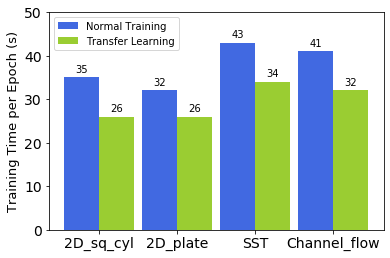

In [24]:
import numpy as np
import matplotlib.pyplot as plt
labels = ['2D_sq_cyl', '2D_plate', 'SST', 'Channel_flow']

# dl_rom = [0.0006, 0.0014, 0.010, 0.017]
# cfd = [0.0024, 0.0039, 0.0045, 0.036]

cfd = [35, 32, 43, 41]
dl_rom = [26, 26, 34, 32]

# dl_rom = [0.926, 0.851, 0.772]
# cfd = [0.912, 0.828, 0.737]


x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, cfd, width, label='Normal Training', color='gold')
# rects2 = ax.bar(x + width/2, dl_rom, width, label='Transfer Learning', color='darkorange')

rects1 = ax.bar(x - width/2, cfd, width, label='Normal Training', color='royalblue')
rects2 = ax.bar(x + width/2, dl_rom, width, label='Transfer Learning', color='yellowgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Training Time per Epoch (s)')
# ax.set_ylabel('Loss/ Mean Absolute Error')
# ax.set_ylim(0,0.04)
ax.set_ylim(0,50)
# ax.set_ylabel('SSIM')
# ax.set_xlabel('Dataset')

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.yaxis.label.set_size(13)

# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()
# plt.savefig(f'barplot_PSNR.eps', dpi=600)
# plt.savefig(f'barplot_SSIM.eps', dpi=600)
plt.savefig(f'transfer_learning_time.eps', dpi=600)

plt.show()